In [68]:
import pandas as pd

df=pd.read_csv('lending_data.csv')
df.shape


(77536, 8)

In [69]:
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [70]:
# Display basic information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB
None


In [71]:
print(df.describe())

          loan_size  interest_rate  borrower_income  debt_to_income  \
count  77536.000000   77536.000000     77536.000000    77536.000000   
mean    9805.562577       7.292333     49221.949804        0.377318   
std     2093.223153       0.889495      8371.635077        0.081519   
min     5000.000000       5.250000     30000.000000        0.000000   
25%     8700.000000       6.825000     44800.000000        0.330357   
50%     9500.000000       7.172000     48100.000000        0.376299   
75%    10400.000000       7.528000     51400.000000        0.416342   
max    23800.000000      13.235000    105200.000000        0.714829   

       num_of_accounts  derogatory_marks    total_debt   loan_status  
count     77536.000000      77536.000000  77536.000000  77536.000000  
mean          3.826610          0.392308  19221.949804      0.032243  
std           1.904426          0.582086   8371.635077      0.176646  
min           0.000000          0.000000      0.000000      0.000000  
25%  

In [72]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64


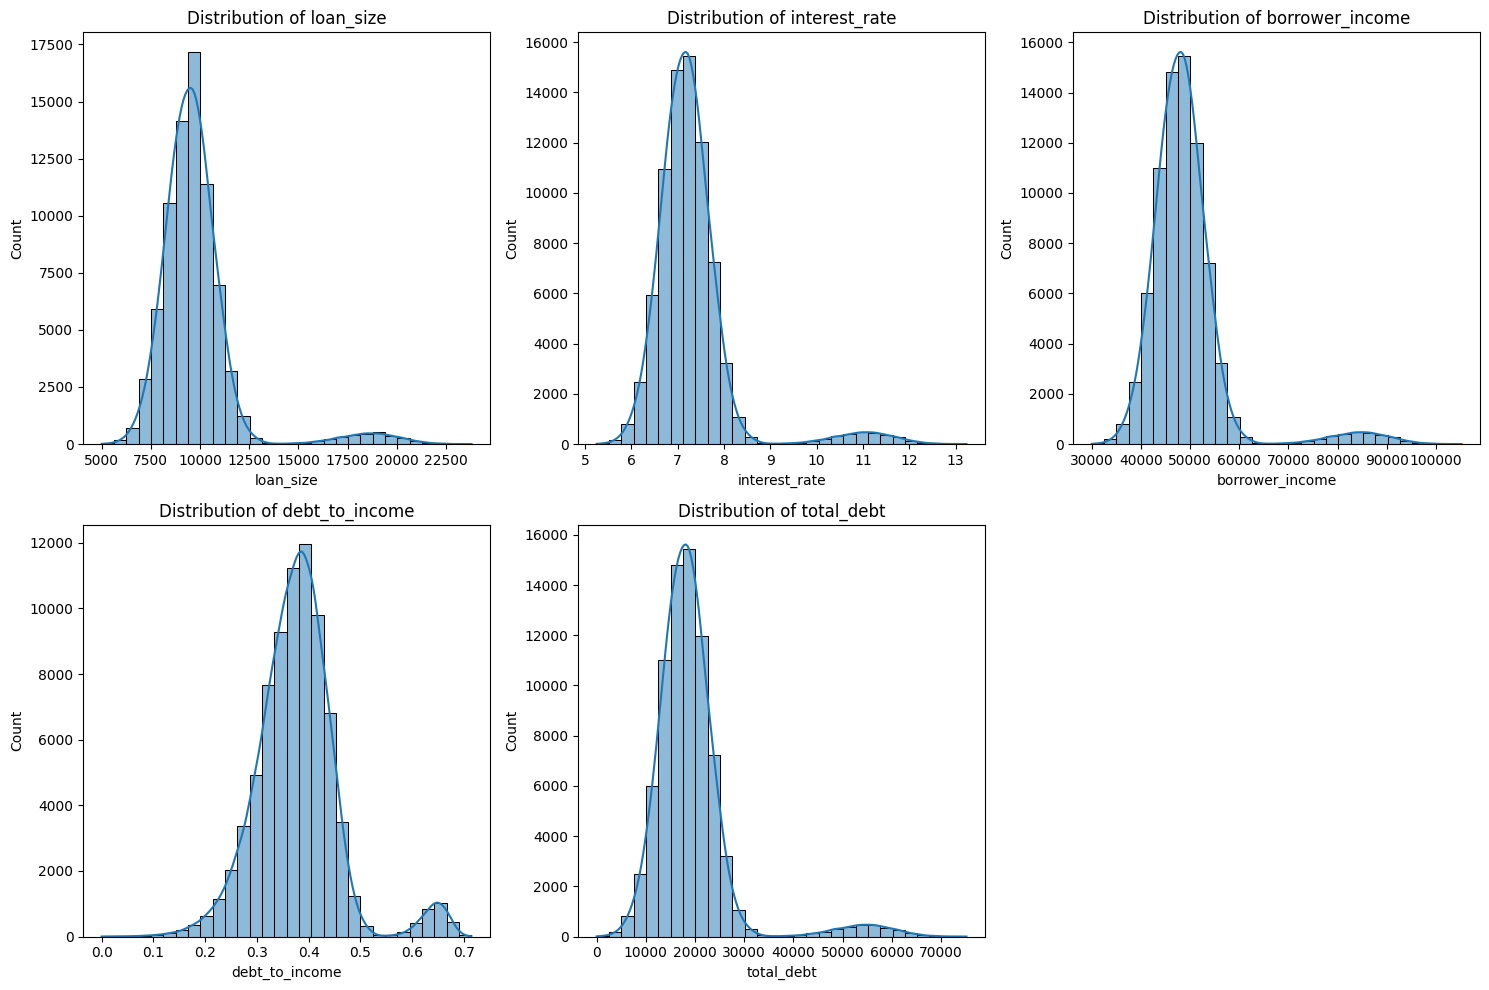

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_features = ['loan_size', 'interest_rate', 'borrower_income',
                       'debt_to_income', 'total_debt']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

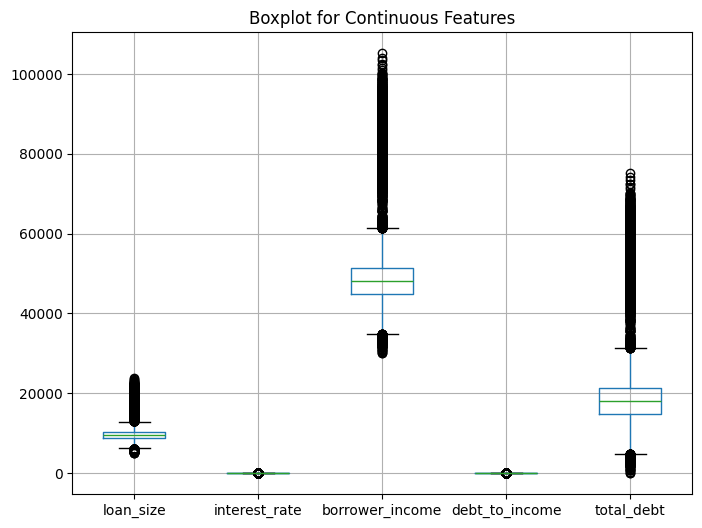

In [74]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(8, 6))
df[continuous_features].boxplot()
plt.title("Boxplot for Continuous Features")
plt.show()

In [75]:
df['borrower_income'].describe()

,borrower_income
count,77536.000000
mean,49221.949804
std,8371.635077
min,30000.000000
25%,44800.000000
50%,48100.000000
75%,51400.000000
max,105200.000000


In [76]:
df['total_debt'].describe()

,total_debt
count,77536.000000
mean,19221.949804
std,8371.635077
min,0.000000
25%,14800.000000
50%,18100.000000
75%,21400.000000
max,75200.000000


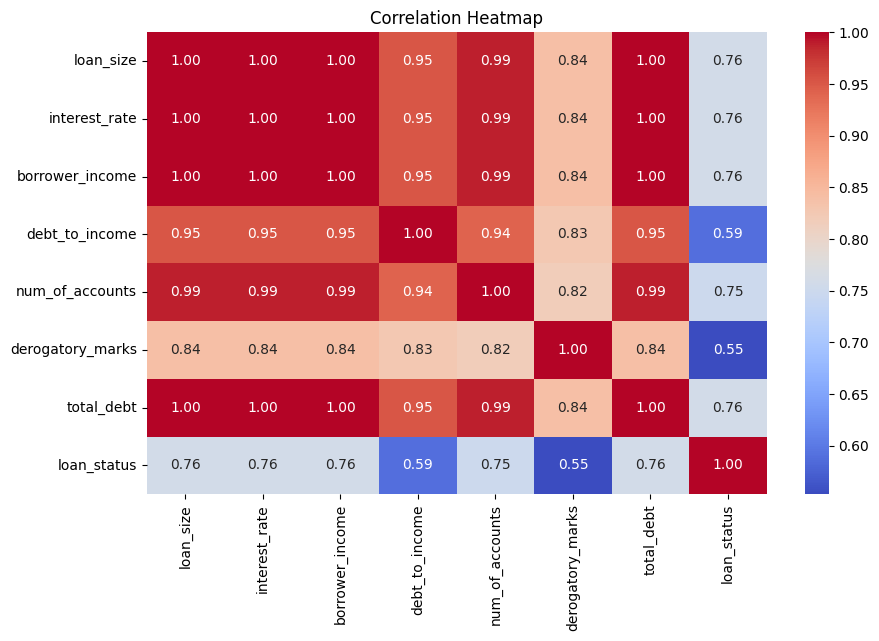

In [77]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [78]:
class_counts= df['loan_status'].value_counts()
class_counts

,count
loan_status,
0,75036
1,2500


Frequency Table for Class distribution
loan_status
1     2500
0    75036
Name: count, dtype: int64


<Axes: xlabel='loan_status'>

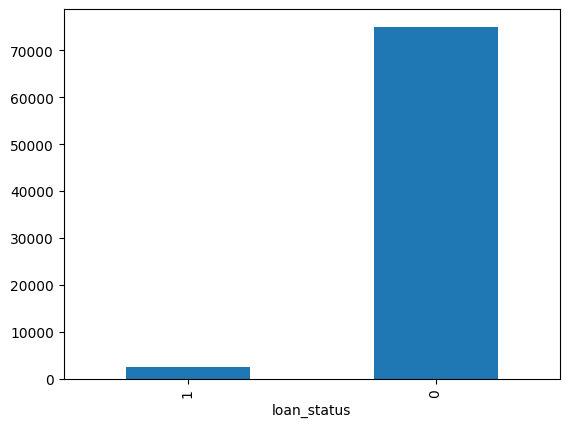

In [79]:
classDist = df['loan_status'].value_counts(ascending=True)
print ('Frequency Table for Class distribution')
print(classDist)
classDist.plot(kind='bar')

In [80]:
X=df.drop(['loan_status'],axis=1)
y=df['loan_status']
y.value_counts()

,count
loan_status,
0,75036
1,2500


<Axes: ylabel='count'>

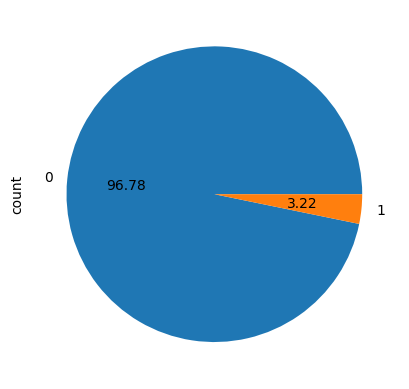

In [81]:
y.value_counts().plot.pie(autopct='%.2f')

# Data Balancing
Using SMOTE technic

In [82]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split data into features (X) and target (y)
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Class distribution after SMOTE:
loan_status
0    52525
1    52525
Name: count, dtype: int64


# Now you can proceed to train a model using X_train_smote and y_train_smote

<Axes: ylabel='count'>

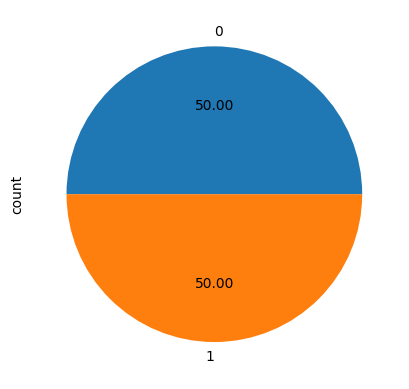

In [83]:
y_train_smote.value_counts().plot.pie(autopct='%.2f')

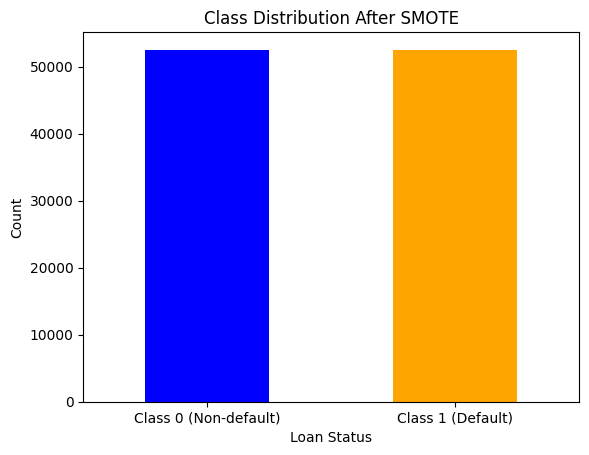

In [84]:
# Plot the class distribution in the balanced data
y_train_smote.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Class 0 (Non-default)', 'Class 1 (Default)'], rotation=0)
plt.show()


# Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model using the resampled data (SMOTE)
log_reg.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9945402175314905
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     22511
           1       0.86      1.00      0.92       750

    accuracy                           0.99     23261
   macro avg       0.93      1.00      0.96     23261
weighted avg       1.00      0.99      0.99     23261

Confusion Matrix:
 [[22385   126]
 [    1   749]]
